In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.metrics import classification_report

In [2]:
ds = pd.read_csv("Admission_Predict.csv")
ds

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
x = ds.iloc[:,:-1]
y = ds.iloc[:,-1]

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [5]:
pca = PCA(.95)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.58696876, 0.12780879, 0.09726866, 0.06555008, 0.04651971,
       0.03393978])

In [6]:
forest = RandomForestRegressor(n_estimators=210,max_depth=6,random_state=0)
forest.fit(x_train, y_train)
y_predict = forest.predict(x_test)

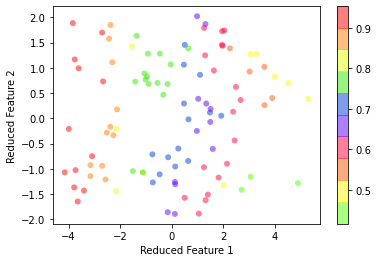

In [7]:
plt.scatter(x_test[:, 0], x_test[:, 1],
            c=y_predict, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('prism_r', 10))
plt.xlabel('Reduced Feature 1')
plt.ylabel('Reduced Feature 2')
plt.colorbar();

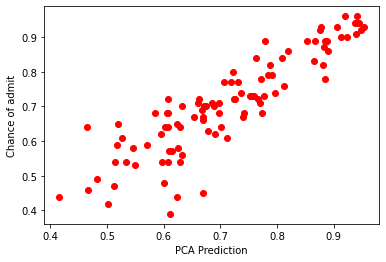

In [8]:
plt.xlabel('PCA Prediction')
plt.ylabel('Chance of admit')
#plt.plot(y_predict,y_test,color='blue');
plt.scatter(y_predict,y_test,color='red');

In [9]:
test_set_mse = mean_squared_error(y_test,y_predict)
test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_predict)))
test_set_r2 = r2_score(y_test, y_predict)

print("Squared Mean Error= ", test_set_mse)
print("Root Squared Mean Error= ", test_set_rmse)
print("Coefficient of Determination= ", test_set_r2)

Squared Mean Error=  0.004142774378810173
Root Squared Mean Error=  0.06436438750435036
Coefficient of Determination=  0.7974193457794537


In [10]:
print("Accuracy Acheived= ", forest.score(x_test,y_test)*100,"%!")

Accuracy Acheived=  79.74193457794537 %!
